In [ ]:
!pip install pycaret

In [ ]:
!pip install streamlit

In [ ]:
#import pingouin as pg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report)
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from pycaret.utils import enable_colab
enable_colab()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving covid_noEDLOS.xlsx to covid_noEDLOS.xlsx


In [5]:
# Load the data
dz = pd.read_excel('covid_noEDLOS.xlsx')

In [6]:
dz.describe()

,Unnamed: 0,EDLOS,PatientAge,ESI_x,Respiratory Therapist,Physician Assistant,Resident,ED Tech,Physician Available,Nurse Available,Bed Available,Systolic_BP,Diastolic_BP,HR,Temp,RR,SpO2,ON_ANTHYPERT,HAS_ABDOM_AORTIC_ANEURYSM_YN,HAS_AFIB,HAS_ALCOHOLISM,HAS_ANEMIA,HAS_ASTHMA,HAS_BREAST_CANCER,HAS_CAD,HAS_CHF,HAS_CHRONIC_HEART_DISEASE,HAS_CHRONIC_LIVER_DISEASE,HAS_CHRONIC_LUNG_DISEASE,HAS_CKD,HAS_COPD,HAS_CVD,HAS_DIABETES,HAS_TYPE_2_DIABETES,HAS_HYPERTENSION,HAS_HEMOGLOBINOPATHIES,HAS_NON_CAD_ATHERO,HAS_PERIPH_VASC_DIS,HAD_HEART_ATTACK,HAS_OBESITY,Sepsis,PatientSex_Female,PatientSex_Male,PatientRace_Asian,PatientRace_Black,PatientRace_Decline,PatientRace_Hispanic,PatientRace_Other,PatientRace_White
count,3301.000000,3301.000000,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03,3.301000e+03
mean,1650.000000,0.652227,-2.576282e-15,1.076254e-16,-5.464889e-16,-2.888245e-15,2.733382e-15,-1.737435e-16,3.315366e-15,-2.048649e-15,-1.556448e-15,-7.163814e-17,-2.894299e-15,-9.171700e-17,4.857066e-15,-1.248118e-16,9.399563e-16,8.025893e-15,6.062546e-16,5.528245e-16,1.734686e-15,1.149372e-15,4.806617e-15,-7.008766e-16,7.722289e-16,2.665141e-15,-7.322763e-15,2.651923e-15,-2.043335e-15,1.410061e-15,4.211314e-15,-3.573701e-15,-5.516810e-16,-1.054762e-15,3.572086e-15,-5.641462e-16,-3.922440e-16,-1.765325e-15,-1.255282e-15,-1.575905e-15,1.263228e-15,-8.186255e-16,8.186255e-16,8.076427e-15,-5.656655e-15,-6.584369e-15,-1.827210e-15,6.764154e-15,-1.673591e-15
std,953.060946,0.476336,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00
min,0.000000,0.000000,-2.121202e+00,-2.435942e+00,-4.928890e-02,-1.865375e-01,-2.151180e-01,-5.512341e-02,-2.876191e+00,-6.352058e-01,-5.193705e+00,-4.573921e+00,-3.553681e+00,-3.963774e+00,-2.899703e+01,-4.706225e+00,-2.134873e+01,-1.277645e+00,-5.228671e-02,-2.301099e-01,-4.500557e-01,-5.949611e-01,-6.150513e-01,-7.608648e-02,-2.127953e-01,-5.112416e-01,-5.145396e-01,-2.539593e-01,-9.984865e-01,-4.417561e-01,-5.375404e-01,-9.775320e-01,-4.529728e-01,-4.534584e-01,-1.329276e+00,-3.894856e-02,-2.462203e-02,-1.635531e-01,-7.608648e-02,-9.311721e-01,-1.121458e-01,-1.360369e+00,-7.350945e-01,-2.308388e-01,-1.719893e+00,-2.158877e-01,-6.978986e-02,-3.287704e-01,-2.408585e-01
25%,825.000000,0.000000,-6.566226e-01,-5.452661e-01,-4.928890e-02,-1.865375e-01,-2.151180e-01,-5.512341e-02,3.476821e-01,-6.352058e-01,1.925408e-01,-6.865592e-01,-6.359168e-01,-6.041790e-01,-2.277131e-01,-3.274140e-01,-1.578071e-01,-1.277645e+00,-5.228671e-02,-2.301099e-01,-4.500557e-01,-5.949611e-01,-6.150513e-01,-7.608648e-02,-2.127953e-01,-5.112416e-01,-5.145396e-01,-2.539593e-01,-9.984865e-01,-4.417561e-01,-5.375404e-01,-9.775320e-01,-4.529728e-01,-4.534584e-01,-1.329276e+00,-3.894856e-02,-2.462203e-02,-1.635531e-01,-7.608648e-02,-9.311721e-01,-1.121458e-01,-1.360369e+00,-7.350945e-01,-2.308388e-01,-1.719893e+00,-2.158877e-01,-6.978986e-02,-3.287704e-01,-2.408585e-

In [7]:
print(dz.shape)

(3301, 49)


In [8]:
dz1 = dz.drop(columns=['PatientAge', 'Respiratory Therapist', 'Physician Assistant', 'Resident', 'ED Tech', 'Systolic_BP',	'Diastolic_BP',	'HR', 'ON_ANTHYPERT',
                                                                  'HAS_ABDOM_AORTIC_ANEURYSM_YN', 'HAS_ALCOHOLISM',	'HAS_ANEMIA',	'HAS_ASTHMA',	'HAS_BREAST_CANCER', 'HAS_CHF',	'HAS_CHRONIC_HEART_DISEASE',
                                                                  'HAS_CHRONIC_LIVER_DISEASE',	'HAS_CHRONIC_LUNG_DISEASE',	'HAS_COPD',	'HAS_TYPE_2_DIABETES',	'HAS_HYPERTENSION',	'HAS_HEMOGLOBINOPATHIES',	'HAS_NON_CAD_ATHERO',	
                                                                  'HAD_HEART_ATTACK', 'Sepsis',	'PatientSex_Female',	'PatientSex_Male',	'PatientRace_Asian',	'PatientRace_Decline',	'PatientRace_Hispanic',	'PatientRace_Other',	'PatientRace_White'])

In [9]:
dz1

,Unnamed: 0,EDLOS,ESI_x,Physician Available,Nurse Available,Bed Available,Temp,RR,SpO2,HAS_AFIB,HAS_CAD,HAS_CKD,HAS_CVD,HAS_DIABETES,HAS_PERIPH_VASC_DIS,HAS_OBESITY,PatientRace_Black
0,0,0,-0.545266,0.347682,-0.635206,0.192541,0.243915,-0.842568,-0.157807,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,1.073915,0.581431
1,1,0,-0.545266,0.347682,-0.635206,0.192541,-0.039062,-1.100145,-0.157807,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,1.073915,0.581431
2,2,0,-0.545266,0.347682,-0.635206,0.192541,-0.180550,0.187740,-0.694286,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,1.073915,0.581431
3,3,0,-0.545266,0.347682,-0.635206,0.192541,-0.086225,-0.327414,0.378672,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,1.073915,0.581431
4,4,0,-0.545266,0.347682,-0.635206,0.192541,-0.557853,-0.327414,0.378672,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,1.073915,0.581431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,3296,1,-0.545266,0.347682,1.574293,0.192541,-0.180550,-0.327414,0.646912,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,-0.931172,0.581431
3297,3297,1,-0.545266,0.347682,1.574293,0.192541,-0.133387,-0.327414,0.646912,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,-0.931172,0.581431
3298,3298,1,-0.545266,0.347682,1.574293,0.192541,-0.039062,0.187740,-0.157807,-0.23011,-0.212795,2.263693,1.022984,2.207638,-0.163553,-0.931172,0.581431
3299,3299,1,1.345410,0.347682,-0.635206,0.192541,-0.227713,-0.327414,0.110432,-0.23011,-0.212795,-0.441756,-0.977532,-0.452973,-0.163553,-0.931172,0.581431


In [ ]:
from pycaret.classification import *
from imblearn.over_sampling import SMOTE

In [11]:
exp_clf102 = setup(data = dz1, target = 'EDLOS', preprocess=False, transformation=False, fix_imbalance=True, fix_imbalance_method=SMOTE(), fold_strategy='kfold', train_size=0.8, session_id=123)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:58:05
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Unnamed: 0,ID Column
ESI_x,Numeric
Physician Available,Categorical
Nurse Available,Categorical
Bed Available,Categorical
Temp,Numeric
RR,Numeric
SpO2,Numeric
HAS_AFIB,Categorical
HAS_CAD,Categorical



Setup Succesfully Completed!


UnboundLocalError: ignored

Gradient Boosting

In [12]:
gbc = create_model('gbc') #, optimize='F1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7727,0.8652,0.9226,0.7673,0.8378,0.4686,0.4914
1,0.7614,0.8857,0.9259,0.7463,0.8264,0.4584,0.4865
2,0.8068,0.8738,0.9607,0.7953,0.8702,0.5052,0.5413
3,0.8485,0.8946,0.9560,0.8447,0.8969,0.6153,0.6324
4,0.7992,0.8585,0.9302,0.7960,0.8579,0.5229,0.5417
5,0.8068,0.8801,0.9091,0.8065,0.8547,0.5696,0.5788
6,0.8220,0.9109,0.9274,0.8300,0.8760,0.5640,0.5750
7,0.8409,0.9080,0.9551,0.8333,0.8901,0.6071,0.6259
8,0.8371,0.8929,0.9239,0.8543,0.8877,0.5928,0.5989
9,0.7955,0.8838,0.9231,0.7919,0.8525,0.5254,0.5421


In [ ]:
optimize_threshold(gbc, true_negative=1500, false_negative=-5000)

In [13]:
gbc1 = create_model('gbc', probability_threshold=0.44)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7614,0.8652,0.9583,0.7419,0.8364,0.4211,0.4716
1,0.7235,0.8857,0.9938,0.6910,0.8152,0.3306,0.4355
2,0.8068,0.8738,0.9663,0.7926,0.8709,0.5018,0.5428
3,0.8295,0.8946,0.9560,0.8246,0.8855,0.5592,0.5832
4,0.7955,0.8585,0.9477,0.7837,0.8579,0.5044,0.5345
5,0.7879,0.8801,0.9394,0.7711,0.8470,0.5120,0.5392
6,0.8333,0.9109,0.9497,0.8293,0.8854,0.5849,0.6034
7,0.8409,0.9080,0.9719,0.8238,0.8918,0.5993,0.6294
8,0.8295,0.8929,0.9402,0.8357,0.8849,0.5608,0.5755
9,0.7765,0.8838,0.9704,0.7523,0.8475,0.4532,0.5086


In [14]:
tuned_gbc = tune_model(gbc1, n_iter=100, optimize='AUC', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.83,0.90,0.93,0.82,0.87,0.60,0.62
1,0.75,0.90,0.91,0.74,0.82,0.43,0.46
2,0.81,0.89,0.92,0.82,0.87,0.55,0.56
3,0.84,0.92,0.95,0.85,0.89,0.61,0.62
4,0.79,0.88,0.89,0.81,0.85,0.51,0.52
5,0.81,0.90,0.91,0.81,0.86,0.58,0.59
6,0.85,0.92,0.93,0.86,0.89,0.64,0.64
7,0.86,0.92,0.94,0.87,0.90,0.67,0.67
8,0.84,0.91,0.90,0.87,0.88,0.61,0.61
9,0.81,0.91,0.92,0.82,0.86,0.58,0.59


In [ ]:
print(tuned_gbc)

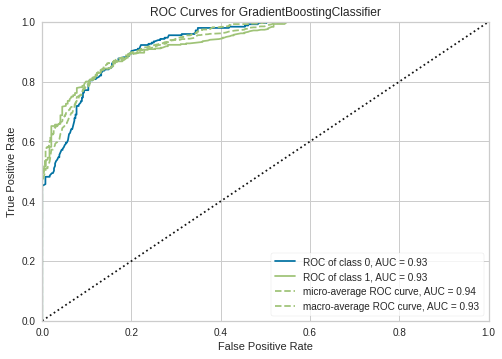

In [15]:
plot_model(tuned_gbc, plot = 'auc')

In [16]:
predict_model(tuned_gbc, round=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.85,0.93,0.92,0.85,0.88,0.66,0.66


,ESI_x,Physician Available,Nurse Available,Bed Available,Temp,RR,SpO2,HAS_AFIB,HAS_CAD,HAS_CKD,HAS_CVD,HAS_DIABETES,HAS_PERIPH_VASC_DIS,HAS_OBESITY,PatientRace_Black,EDLOS,Label,Score
0,-0.545266,0.347682,-0.635206,0.192541,0.668380,-0.327414,-0.157807,-0.23011,-0.212795,-0.441756,-0.977532,-0.452973,-0.163553,1.07392,-1.71989,1,1,0.86
1,1.345410,0.347682,-0.635206,0.192541,-0.274876,-0.584991,0.378672,-0.23011,-0.212795,2.26369,1.02298,-0.452973,6.11422,1.07392,-1.71989,0,0,0.65
2,-0.545266,-2.87619,-0.635206,0.192541,0.291078,-1.357723,0.378672,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.99
3,-0.545266,-2.87619,-0.635206,0.192541,-0.086225,0.187740,0.646912,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.99
4,1.345410,0.347682,-0.635206,-5.19371,-0.369202,-0.842568,0.378672,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,-0.545266,0.347682,-0.635206,0.192541,-0.463527,-0.842568,-0.426047,-0.23011,4.69935,2.26369,-0.977532,2.20764,-0.163553,-0.931172,0.581431,1,1,0.97
657,-0.545266,0.347682,-0.635206,0.192541,-0.369202,0.187740,0.646912,4.34575,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,-0.931172,-1.71989,1,1,0.97
658,-0.545266,0.347682,-0.635206,0.192541,1.422985,-0.327414,0.646912,-0.23011,-0.212795,-0.441756,-0.977532,-0.452973,-0.163553,-0.931172,0.581431,0,1,0.49
659,1.345410,0.347682,1.57429,0.192541,-0.180550,-0.327414,0.646912,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,1,1,0.98


Finalize the model

In [ ]:
final_rf = finalize_model(tuned_gbc)

In [ ]:
print(final_rf)

In [19]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8911,0.9693,0.9303,0.9,0.9149,0.7637,0.7646


,ESI_x,Physician Available,Nurse Available,Bed Available,Temp,RR,SpO2,HAS_AFIB,HAS_CAD,HAS_CKD,HAS_CVD,HAS_DIABETES,HAS_PERIPH_VASC_DIS,HAS_OBESITY,PatientRace_Black,EDLOS,Label,Score
0,-0.545266,0.347682,-0.635206,0.192541,0.668380,-0.327414,-0.157807,-0.23011,-0.212795,-0.441756,-0.977532,-0.452973,-0.163553,1.07392,-1.71989,1,1,0.8700
1,1.345410,0.347682,-0.635206,0.192541,-0.274876,-0.584991,0.378672,-0.23011,-0.212795,2.26369,1.02298,-0.452973,6.11422,1.07392,-1.71989,0,0,0.9165
2,-0.545266,-2.87619,-0.635206,0.192541,0.291078,-1.357723,0.378672,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.9928
3,-0.545266,-2.87619,-0.635206,0.192541,-0.086225,0.187740,0.646912,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.9906
4,1.345410,0.347682,-0.635206,-5.19371,-0.369202,-0.842568,0.378672,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,0,0,0.9867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,-0.545266,0.347682,-0.635206,0.192541,-0.463527,-0.842568,-0.426047,-0.23011,4.69935,2.26369,-0.977532,2.20764,-0.163553,-0.931172,0.581431,1,1,0.9812
657,-0.545266,0.347682,-0.635206,0.192541,-0.369202,0.187740,0.646912,4.34575,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,-0.931172,-1.71989,1,1,0.9807
658,-0.545266,0.347682,-0.635206,0.192541,1.422985,-0.327414,0.646912,-0.23011,-0.212795,-0.441756,-0.977532,-0.452973,-0.163553,-0.931172,0.581431,0,1,0.4831
659,1.345410,0.347682,1.57429,0.192541,-0.180550,-0.327414,0.646912,-0.23011,-0.212795,-0.441756,1.02298,-0.452973,-0.163553,1.07392,0.581431,1,1,0.9883


Saving the model

In [20]:
save_model(final_rf, model_name= 'gbc_deployment_01Jan2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Unnamed: 0'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='EDLOS',
                                       time_features=[])),
                 ['trained_model',
                  CustomProbabilityThresholdClassifier(ccp_alpha=0.0,
                                                       classifier=GradientBoostingClassifier(ccp_alpha=0.0,...
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0,
                                                       min_impurity_split=None,
       